In [12]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import yfinance as yf

=== AAPL Stock Data Sample ===


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock,date_only
0,2020-01-02 00:00:00+00:00,74.059998,75.150002,73.797501,75.087502,72.876099,135480400,0.0,0.0,AAPL,2020-01-02
1,2020-01-03 00:00:00+00:00,74.287498,75.144997,74.125000,74.357498,72.167595,146322800,0.0,0.0,AAPL,2020-01-03
2,2020-01-06 00:00:00+00:00,73.447502,74.989998,73.187500,74.949997,72.742661,118387200,0.0,0.0,AAPL,2020-01-06
3,2020-01-07 00:00:00+00:00,74.959999,75.224998,74.370003,74.597504,72.400536,108872000,0.0,0.0,AAPL,2020-01-07
4,2020-01-08 00:00:00+00:00,74.290001,76.110001,74.290001,75.797501,73.565208,132079200,0.0,0.0,AAPL,2020-01-08



=== S&P 500 Data Sample ===


,Date,Open,High,Low,Close,Volume
1,2020-01-02 00:00:00+00:00,3244.669921875,3258.139892578125,3235.530029296875,3257.85009765625,3459930000
2,2020-01-03 00:00:00+00:00,3226.360107421875,3246.14990234375,3222.340087890625,3234.85009765625,3484700000
3,2020-01-06 00:00:00+00:00,3217.550048828125,3246.840087890625,3214.639892578125,3246.280029296875,3702460000
4,2020-01-07 00:00:00+00:00,3241.860107421875,3244.909912109375,3232.429931640625,3237.179931640625,3435910000
5,2020-01-08 00:00:00+00:00,3238.590087890625,3267.070068359375,3236.669921875,3253.050048828125,3726840000



=== AAPL Data with Indicators and Metrics ===


,Close,SMA_20,RSI_14,MACD,BB_Upper,ADX,Stoch_K,Returns,Sharpe
Date,,,,,,,,,
2020-12-23 00:00:00+00:00,130.960007,124.106000,66.417825,3.154518,132.469160,19.541019,81.249492,-0.007000,6.182994
2020-12-24 00:00:00+00:00,131.970001,124.903000,67.866386,3.323474,133.071583,20.490430,80.317913,0.007683,6.194366
2020-12-28 00:00:00+00:00,136.690002,125.908001,73.597952,3.794496,134.663063,22.103937,84.971476,0.035141,7.137127
2020-12-29 00:00:00+00:00,134.869995,126.699000,68.522632,3.975103,135.688185,23.837380,86.025970,-0.013404,5.493324
2020-12-30 00:00:00+00:00,133.720001,127.249000,65.451324,3.979567,136.538125,25.041166,82.663061,-0.008563,3.921352


Columns in aapl_df: Index(['index', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'stock', 'date_only', 'Close_sp500',
       'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'BB_Upper',
       'BB_Middle', 'BB_Lower', 'ADX', 'Stoch_K', 'Stoch_D', 'Returns',
       'Volatility', 'Sharpe', 'Cum_Returns'],
      dtype='object')


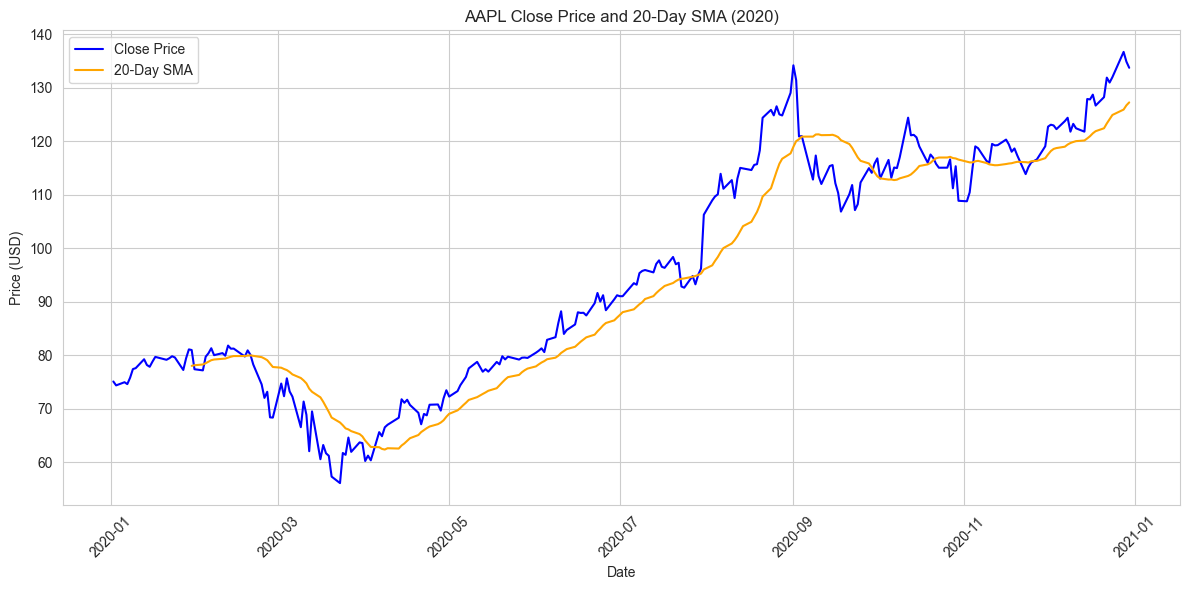

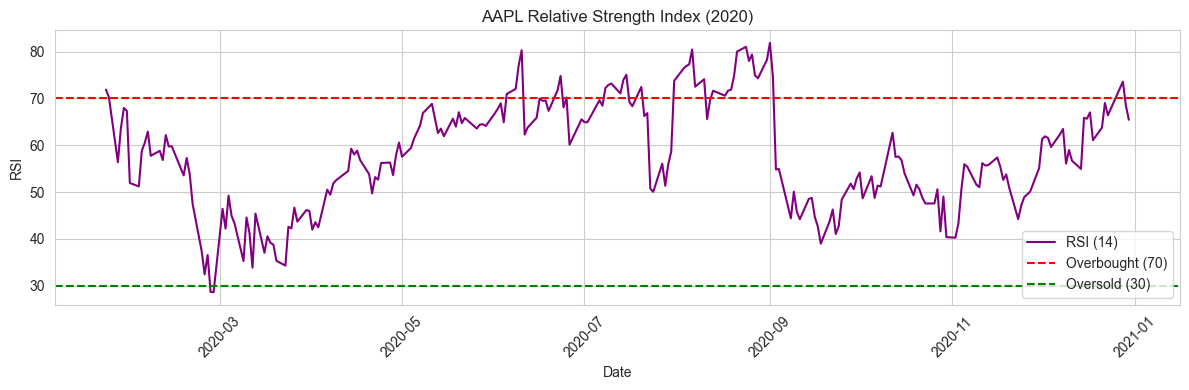

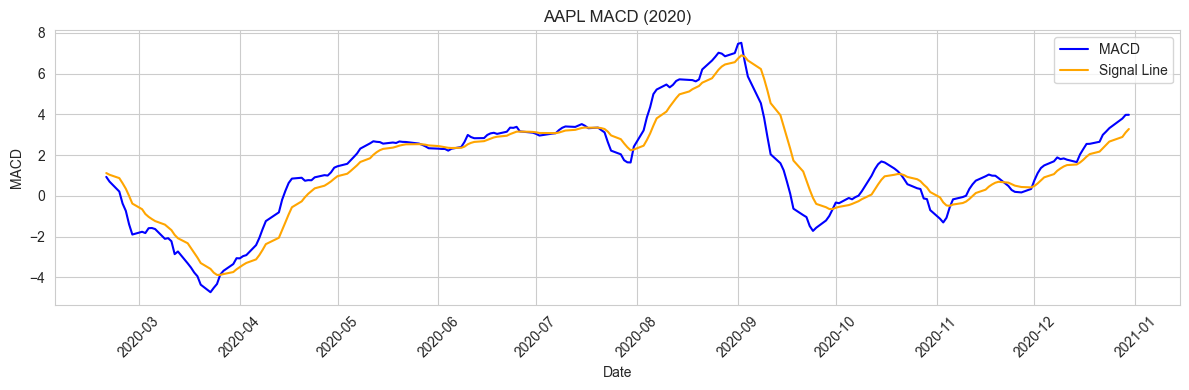

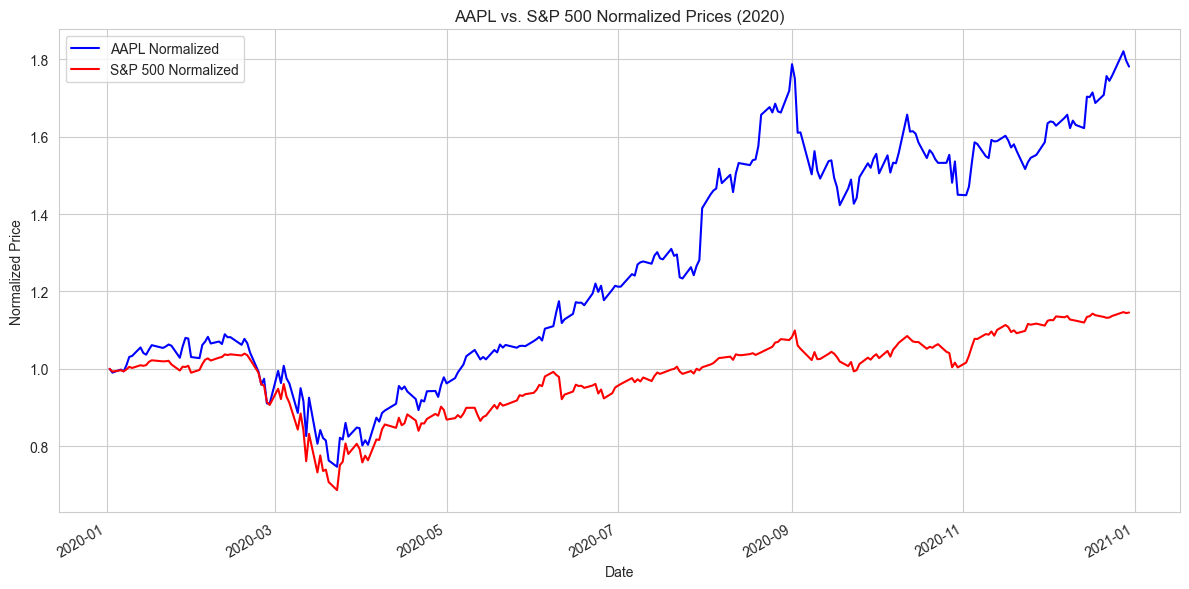

In [13]:
# ---
# title: Quantitative Analysis for 2020 AAPL Stock Data
# description: Notebook to load stock data and compute technical indicators using pynance and TA-Lib
# ---

# ### 1.Adjust Python Path
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.finance_utils import load_stock_data, compute_technical_indicators, compute_financial_metrics

# Set plot style
sns.set_style("whitegrid")

# ### 2. Load AAPL Stock Data
aapl_file = '../data/stock_prices_cleaned_2020.csv'
aapl_df = load_stock_data(aapl_file)
if aapl_df is None:
    raise SystemExit("Failed to load AAPL data. Check file path.")

print("=== AAPL Stock Data Sample ===")
display(aapl_df.head())

# ### 3. Load Additional Financial Data (S&P 500)
sp500_file = '../data/sp500_historical_data_2020.csv'

def fetch_sp500_data():
    """Fetch S&P 500 data for 2020 using yfinance."""
    try:
        sp500 = yf.download('^GSPC', start='2020-01-01', end='2020-12-31')
        if sp500.empty:
            raise ValueError("No data returned for S&P 500.")
        sp500.reset_index(inplace=True)
        sp500['Date'] = pd.to_datetime(sp500['Date'], utc=True)
        sp500 = sp500[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
        sp500.to_csv(sp500_file, index=False)
        return sp500
    except Exception as e:
        print(f"Error fetching S&P 500 data: {e}")
        return None

sp500_df = load_stock_data(sp500_file)
if sp500_df is None:
    print("S&P 500 data not found locally. Fetching via yfinance...")
    sp500_df = fetch_sp500_data()
if sp500_df is None:
    print("Failed to fetch S&P 500 data. Proceeding with AAPL data only.")
else:
    print("\n=== S&P 500 Data Sample ===")
    display(sp500_df.head())

# ### 4. Compute Indicators and Metrics
# Reset indices to ensure single-level columns
aapl_df = aapl_df.reset_index()
if sp500_df is not None:
    sp500_df = sp500_df.reset_index()

    # Merge on Date column
    try:
        aapl_df = aapl_df.merge(
            sp500_df[['Date', 'Close']],
            on='Date',
            how='inner',
            suffixes=('', '_sp500')
        )
    except Exception as e:
        print(f"Merge failed: {e}. Proceeding with AAPL data only.")
        sp500_df = None
else:
    print("No S&P 500 data; analyzing AAPL only.")

# Set Date as index
aapl_df.set_index('Date', inplace=True)

# Compute indicators and metrics
aapl_df = compute_technical_indicators(aapl_df)
aapl_df = compute_financial_metrics(aapl_df)

print("\n=== AAPL Data with Indicators and Metrics ===")
display(aapl_df[['Close', 'SMA_20', 'RSI_14', 'MACD', 'BB_Upper', 'ADX', 'Stoch_K', 'Returns', 'Sharpe']].tail())
print("Columns in aapl_df:", aapl_df.columns)


# ### 5. Visualize Technical Indicators
# Plot Close Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['Close'], label='Close Price', color='blue')
plt.plot(aapl_df.index, aapl_df['SMA_20'], label='20-Day SMA', color='orange')
plt.title('AAPL Close Price and 20-Day SMA (2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/aapl_sma_2020.png')
plt.show()

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(aapl_df.index, aapl_df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('AAPL Relative Strength Index (2020)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/aapl_rsi_2020.png')
plt.show()

# Plot MACD
plt.figure(figsize=(12, 4))
plt.plot(aapl_df.index, aapl_df['MACD'], label='MACD', color='blue')
plt.plot(aapl_df.index, aapl_df['MACD_Signal'], label='Signal Line', color='orange')
plt.title('AAPL MACD (2020)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/aapl_macd_2020.png')
plt.show()

# ### 6. Compare AAPL with S&P 500 (if available)
if sp500_df is not None:
    # Ensure S&P 500 Close is numeric
    sp500_df['Close'] = pd.to_numeric(sp500_df['Close'], errors='coerce')
    # Merge, retaining AAPL Close and adding S&P 500 Close as Close_sp500
    merged_df = aapl_df.reset_index()[['Date', 'Close']].merge(
        sp500_df[['Date', 'Close']],
        on='Date',
        how='inner',
        suffixes=('_aapl', '_sp500')
    )
    merged_df.set_index('Date', inplace=True)
    aapl_df = merged_df  # Update aapl_df with merged data

    # Normalize prices for comparison
    aapl_normalized = aapl_df['Close_aapl'] / aapl_df['Close_aapl'].iloc[0]
    sp500_normalized = aapl_df['Close_sp500'] / aapl_df['Close_sp500'].iloc[0]
    
    plt.figure(figsize=(12, 6))
    plt.plot(aapl_df.index, aapl_normalized, label='AAPL Normalized', color='blue')
    plt.plot(aapl_df.index, sp500_normalized, label='S&P 500 Normalized', color='red')
    plt.title('AAPL vs. S&P 500 Normalized Prices (2020)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gcf().autofmt_xdate()  # Auto-format date ticks
    plt.tight_layout()
    plt.savefig('plots/aapl_vs_sp500_2020.png')
    plt.show()
else:
    print("No S&P 500 data available for comparison.")

# ### 7. Save Results
aapl_df.to_csv('../data/aapl_with_indicators_2020.csv', index=False)